In [7]:
#!/usr/bin/env python3
"""
HRP Portfolio Optimizer
Author: John E. Putman II
Date: 12/13/2024
"""

# Standard library imports
import sys
import warnings
from pathlib import Path

# Configure path
notebook_dir = Path.cwd()
project_root = notebook_dir.parent
sys.path.append(str(project_root))

# Third-party imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Suppress warnings
warnings.filterwarnings('ignore')

# Local application imports
from src.proc.data_handler import DataHandler
from src.hrp.core import create_hrp_portfolio
from src.viz.plots import plot_portfolio_analysis


In [8]:
# Environment Information
print(f"Python version: {sys.version}")
print("\nKey package versions:")
for package in ['numpy', 'pandas', 'matplotlib', 'yfinance']:
    print(f"{package}: {__import__(package).__version__}")

Python version: 3.11.2 (tags/v3.11.2:878ead1, Feb  7 2023, 16:38:35) [MSC v.1934 64 bit (AMD64)]

Key package versions:
numpy: 1.23.5
pandas: 1.5.3
matplotlib: 3.7.1
yfinance: 0.2.36


2024-12-16 12:31:46,051 - DataHandler - WARNING - Unusual interest coverage ratios (<-100) found for:
Tickers: ['NASDAQGS:MRNA']
Values: [-112.2083]
Tickers: ['NASDAQGS:MRNA']
Values: [-112.2083]
INFO:src.hrp.core:Downloading historical data...
[*********************100%%**********************]  50 of 50 completed
INFO:src.hrp.core:Calculating correlation and distance matrices...
INFO:src.hrp.core:Performing hierarchical clustering...
INFO:src.hrp.core:Calculating cluster risk metrics...
INFO:src.hrp.core:Applying market cap constraints...
INFO:src.hrp.core:Applying maximum weight constraint of 5.0%...
INFO:src.hrp.core:Portfolio optimization complete



Final Portfolio Allocation:
Ticker
ADBE    0.0500
AMAT    0.0377
AMD     0.0500
AMP     0.0205
APA     0.0025
APTV    0.0053
BG      0.0045
BIIB    0.0098
BIO     0.0041
CAH     0.0244
CNC     0.0252
COP     0.0379
COR     0.0386
CSGP    0.0139
CTRA    0.0082
CVS     0.0500
DVN     0.0065
DXCM    0.0134
ELV     0.0500
ENPH    0.0043
FCX     0.0233
FSLR    0.0091
HAL     0.0074
INCY    0.0059
LEN     0.0162
LRCX    0.0263
MCK     0.0500
MKTX    0.0039
MOH     0.0146
MRK     0.0500
MRNA    0.0072
MTCH    0.0033
MU      0.0295
NEM     0.0204
NKE     0.0447
NUE     0.0119
NVDA    0.0500
NVR     0.0104
ODFL    0.0167
ON      0.0077
PHM     0.0095
QCOM    0.0476
QRVO    0.0018
REGN    0.0346
SLB     0.0169
TFX     0.0033
VICI    0.0126
VRSN    0.0083
dtype: float64


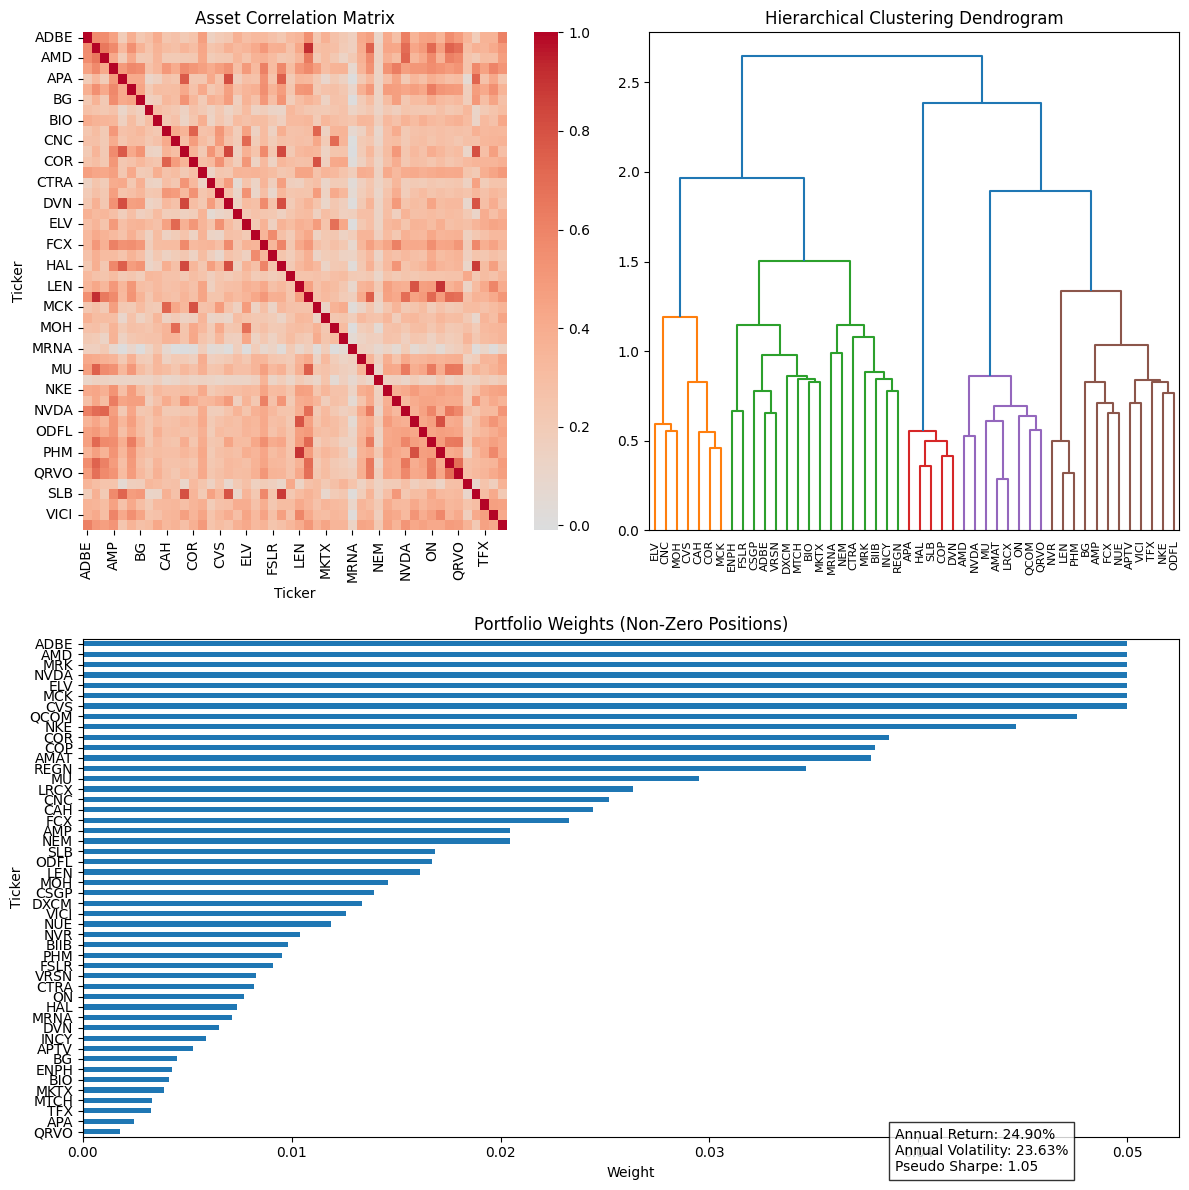

In [9]:
if __name__ == "__main__":
    handler = DataHandler()
    
    df = handler.load_market_data('../data/sp500_data.csv', 2000) # data source Finbox and/or EODHistorical
    df = handler.calculate_quality_metrics(df)
    df = handler.calculate_financial_strength(df)
    df = handler.calculate_value_metrics(df)
    df = handler.calculate_composite_score(df)
    hrp_df = handler.prepare_hrp_data(df, 50)
    
    try:
        weights, linkage_matrix, returns = create_hrp_portfolio(
            tickers=hrp_df['ticker'].tolist(),
            market_caps=hrp_df['market_cap'].tolist(),
            start_date="2019-05-01",
            end_date="2024-12-10",
            num_clusters = 5,
            max_weight = 0.05
        )
        
        print("\nFinal Portfolio Allocation:")
        print(weights.round(4))
        
        fig = plot_portfolio_analysis(returns, weights, linkage_matrix)
        plt.show()
        
    except Exception as e:
        print(f"Failed to create portfolio: {e}")